In [1]:
# The purpose of this is for the visualized figures to be inline the browser
%matplotlib inline
import numpy as np
import os

# Import stuff from menpo
import menpo.io as mio
from menpo.feature import no_op, dsift, fast_dsift, double_igo
from menpo.visualize import visualize_images, visualize_pointclouds, print_dynamic, print_progress
from menpo.landmark import labeller, human36M_pose_32, human36M_pose_17

# Import stuff from menpofit
from menpofit.visualize import visualize_shape_model, visualize_fitting_result, plot_ced

# Import stuff from alabortijcv2015 (this will be soon integrated in menpofit)
from alabortijcv2015.aam import PartsAAMBuilder, PartsAAMFitter
from alabortijcv2015.aam.algorithm import SIC, BSC
from alabortijcv2015.utils import pickle_load, pickle_dump
from alabortijcv2015.result import SerializableResult

# Other stuff
import numpy as np
import re
from itertools import islice
save_path='/vol/atlas/homes/mej114/results'

:0: FutureWarning: IPython widgets are experimental and may change in the future.
/vol/atlas/homes/mej114/yes/envs/menpo/lib/python2.7/site-packages/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


In [2]:
def compute_error_custom(pointcloud1,pointcloud2):
        import math
        from menpo.shape import PointUndirectedGraph
              
        adjency_matrix=np.array([[0, 1, 1, 0, 0],
                         [1, 0, 1, 1, 0],
                         [1, 1, 0, 0, 1],
                         [0, 1, 0, 0, 1],
                         [0, 0, 1, 1, 0]])
        a=pointcloud1.lms.points[:5]
        a=PointUndirectedGraph(np.array(a),adjency_matrix)
        b=a.bounding_box().points
 
        x=b[1][0]-b[0][0]
        y=b[1][1]-b[3][1]
        norm=math.sqrt(x*x+y*y)
       
        return np.mean(np.sqrt(np.sum((pointcloud1.lms.points-pointcloud2.lms.points)**2,axis=-1)))/norm

landmarks : 17
added : feet and hands

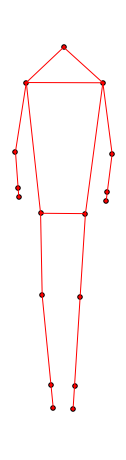

In [3]:
aam_17 = pickle_load(save_path + 'PartsAAM_fast_dsiftFashionPose_17.pickle')
visualize_shape_model(aam_17.shape_models)

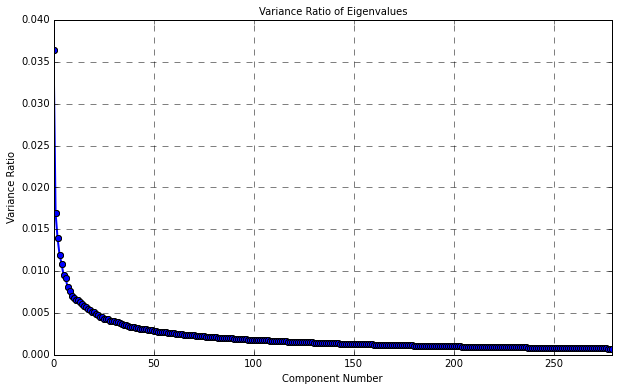

In [4]:
aam_17.appearance_models[1].plot_eigenvalues_ratio()

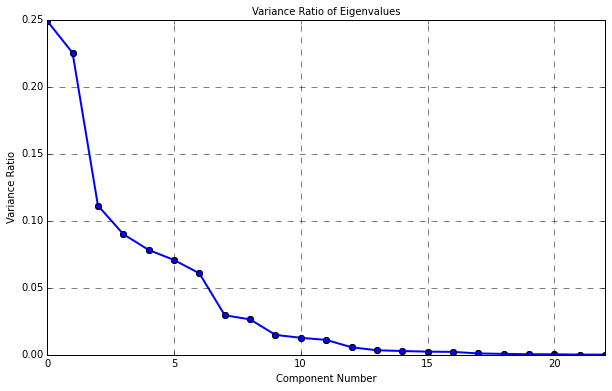

In [5]:
aam_17.shape_models[1].plot_eigenvalues_ratio()

In [11]:
fitter_results_17=pickle_load(save_path+'PartsAAM_fast_dsift_noiseNoneFashionPose_17_1000.pickle')

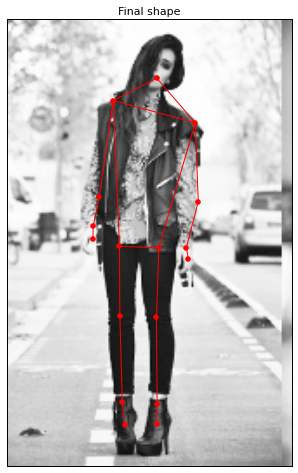

In [12]:
visualize_fitting_result(fitter_results_17)

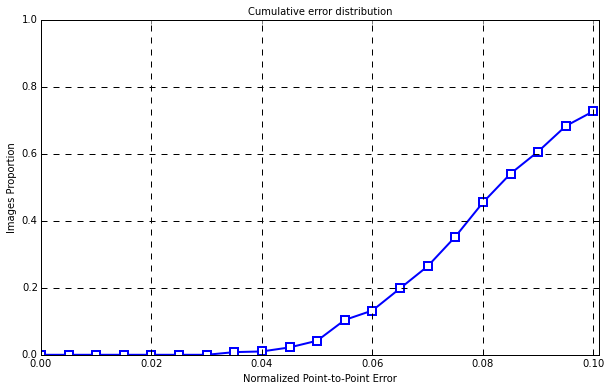

In [8]:
error_custom=[]
for im in fitter_results_17:
    m=im.fitted_image.landmarks['ground']
    n=im.fitted_image.landmarks['final']
    distance=compute_error_custom(m,n)
    error_custom.append(distance)
plot_ced(error_custom)

In [9]:
print("               |  mean  | median |  std  ")

print("Fitting result | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(error_custom), 
                                                            np.median(error_custom),
                                                            np.std(error_custom)))

               |  mean  | median |  std  
Fitting result | 0.0877 | 0.0827 | 0.0281


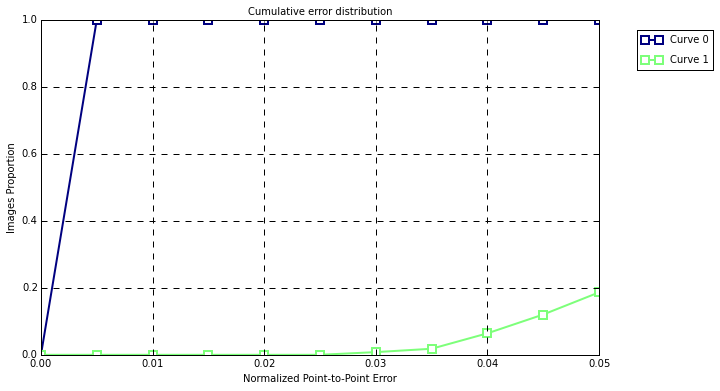

In [10]:
error_type = 'me_norm' #'me_norm', or 'me' or 'rmse'

initial_errors = [fr.initial_error(error_type=error_type) for fr in fitter_results_17]
final_errors = [fr.final_error(error_type=error_type) for fr in fitter_results_17]

plot_ced([initial_errors, final_errors])

In [11]:
print("               |  mean  | median |  std  ")
print("Initialization | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(initial_errors), 
                                                            np.median(initial_errors),
                                                            np.std(initial_errors)))
print("Fitting result | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(final_errors), 
                                                            np.median(final_errors),
                                                            np.std(final_errors)))

               |  mean  | median |  std  
Initialization | 0.0034 | 0.0034 | 0.0003
Fitting result | 0.0662 | 0.0640 | 0.0190


landmarks : 19
add end of feet

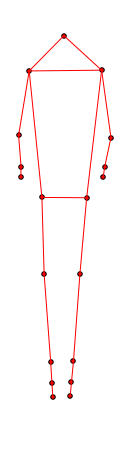

In [7]:
aam_19 = pickle_load(save_path + 'dsfit_partAAM_FashionPose_19_1000.pickle')
visualize_shape_model(aam_19.shape_models)

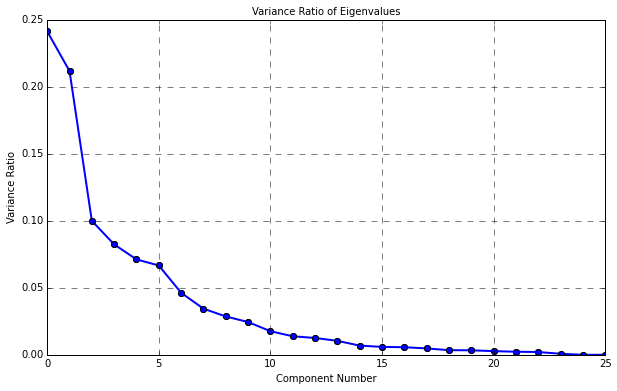

In [17]:
aam_19.shape_models[1].plot_eigenvalues_ratio()

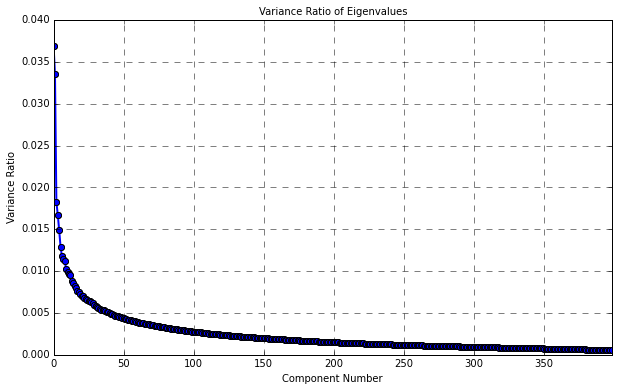

In [18]:
aam_19.appearance_models[1].plot_eigenvalues_ratio()

In [9]:
fitter_results_19=pickle_load(save_path+'dsfit_noiseNone_FashionPose_19_1000.pickle')

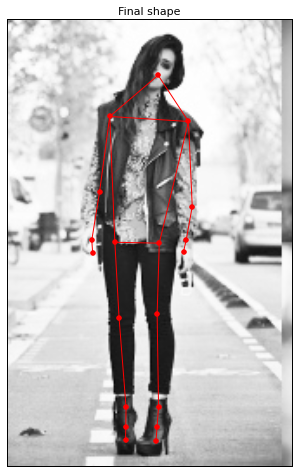

In [10]:
visualize_fitting_result(fitter_results_19)

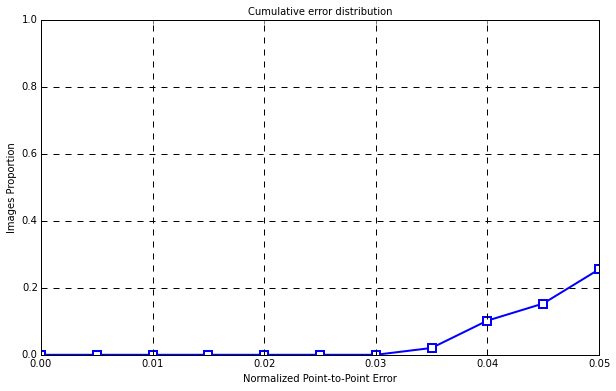

In [7]:
error_custom=[]
for im in fitter_results_19:
    m=im.fitted_image.landmarks['ground']
    n=im.fitted_image.landmarks['final']
    distance=compute_error_custom(m,n)
    error_custom.append(distance)
plot_ced(error_custom)

In [8]:
print("               |  mean  | median |  std  ")

print("Fitting result | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(error_custom), 
                                                            np.median(error_custom),
                                                            np.std(error_custom)))

               |  mean  | median |  std  
Fitting result | 0.0633 | 0.0612 | 0.0182


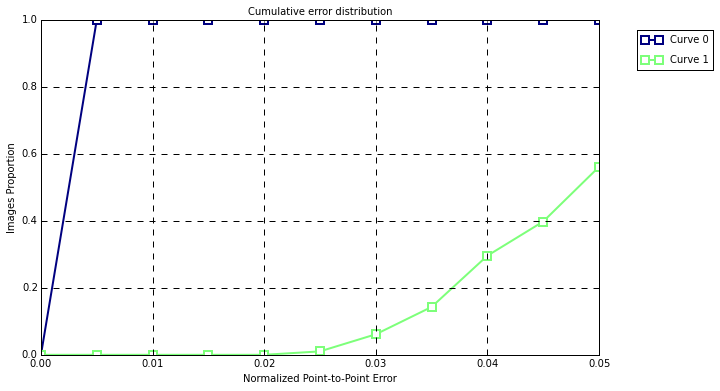

In [19]:
error_type = 'me_norm' #'me_norm', or 'me' or 'rmse'

initial_errors = [fr.initial_error(error_type=error_type) for fr in fitter_results_19]
final_errors = [fr.final_error(error_type=error_type) for fr in fitter_results_19]

plot_ced([initial_errors, final_errors])

In [20]:
print("               |  mean  | median |  std  ")
print("Initialization | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(initial_errors), 
                                                            np.median(initial_errors),
                                                            np.std(initial_errors)))
print("Fitting result | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(final_errors), 
                                                            np.median(final_errors),
                                                            np.std(final_errors)))

               |  mean  | median |  std  
Initialization | 0.0035 | 0.0035 | 0.0003
Fitting result | 0.0488 | 0.0474 | 0.0133


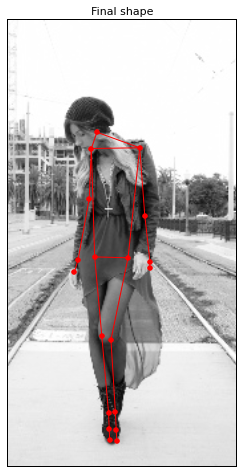

In [28]:
visualize_fitting_result(fitter_results_19)

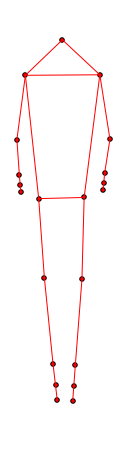

In [22]:
aam_21 = pickle_load(save_path + 'dsfit_partAAM_FashionPose_21.pickle')
visualize_shape_model(aam_21.shape_models)

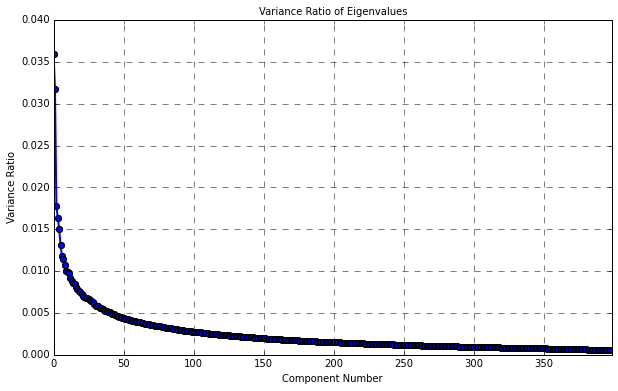

In [23]:
aam_21.appearance_models[1].plot_eigenvalues_ratio()

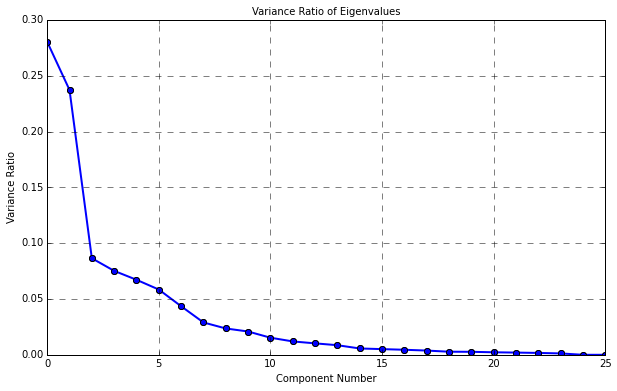

In [24]:
aam_21.shape_models[1].plot_eigenvalues_ratio()

In [15]:
fitter_results_21=pickle_load(save_path+'dsfit_noiseNone_FashionPose_21_1000.pickle')

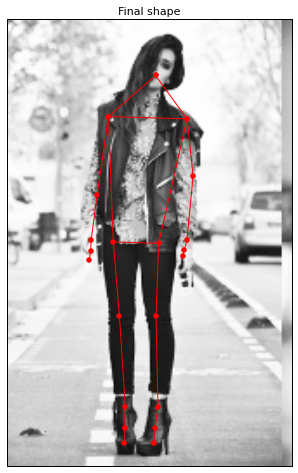

In [16]:
visualize_fitting_result(fitter_results_21)

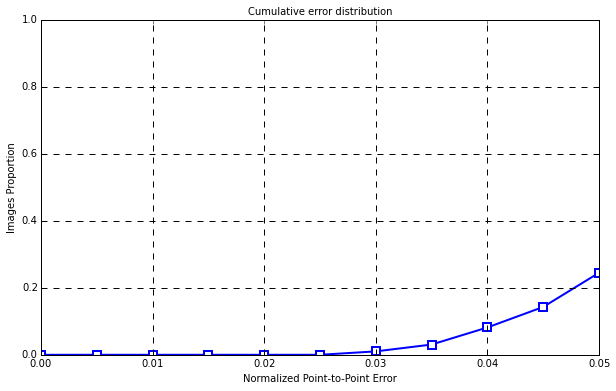

In [12]:
error_custom=[]
for im in fitter_results_21:
    m=im.fitted_image.landmarks['ground']
    n=im.fitted_image.landmarks['final']
    distance=compute_error_custom(m,n)
    error_custom.append(distance)
plot_ced(error_custom)

In [13]:
print("               |  mean  | median |  std  ")

print("Fitting result | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(error_custom), 
                                                            np.median(error_custom),
                                                            np.std(error_custom)))

               |  mean  | median |  std  
Fitting result | 0.0650 | 0.0626 | 0.0193


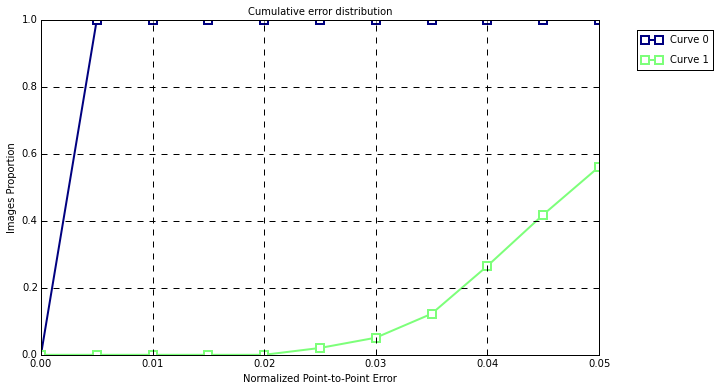

In [25]:
error_type = 'me_norm' #'me_norm', or 'me' or 'rmse'

initial_errors = [fr.initial_error(error_type=error_type) for fr in fitter_results_21]
final_errors = [fr.final_error(error_type=error_type) for fr in fitter_results_21]

plot_ced([initial_errors, final_errors])

In [27]:
print("               |  mean  | median |  std  ")
print("Initialization | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(initial_errors), 
                                                            np.median(initial_errors),
                                                            np.std(initial_errors)))
print("Fitting result | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(final_errors), 
                                                            np.median(final_errors),
                                                            np.std(final_errors)))

               |  mean  | median |  std  
Initialization | 0.0035 | 0.0035 | 0.0003
Fitting result | 0.0488 | 0.0474 | 0.0133


In [17]:
n_training_images = 3200
n_testing_images = 1000
max_images = n_training_images +n_testing_images
all_paths = []
for path in mio.image_paths('/vol/atlas/databases/body/FashionPose/Trainset/rescaled_img_train/'):
    all_paths.append(path)
    
path_initial = '/vol/atlas/databases/body/FashionPose/Trainset/InitialShapes/'
images = []
for path in print_progress(all_paths[:max_images]):
    im = mio.import_image(path)
    if im.n_channels == 3:
        im = im.as_greyscale(mode='luminosity')
    
    sh = mio.import_landmark_file(path_initial + os.path.basename(str(path))[:-3] + 'ljson')
    im.landmarks['CNN'] = sh    
    images.append(im)

[====================] 100% (4200/4200) - 00:00:00 remaining


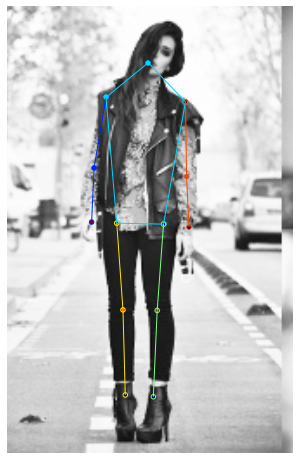

In [18]:
visualize_images(images)

In [28]:
error_landmarks=[]
error_results=[]
for i in range(len(fitter_results_19)):
    point_17=fitter_results_17[i+901].fitted_image.landmarks['final'].lms.as_vector()
    point_19=fitter_results_19[i].fitted_image.landmarks['final'].lms.as_vector()
    point_21=fitter_results_21[i].fitted_image.landmarks['final'].lms.as_vector()
    error_17=images[i+3202].landmarks['LJSON'].lms.as_vector()-point_17[:26]
    error_19=images[i+3202].landmarks['LJSON'].lms.as_vector()-point_19[:26]
    error_21=images[i+3202].landmarks['LJSON'].lms.as_vector()-point_21[:26]
    result=[0]*len(error_17)
    total=[0]*3
    for j in range(len(error_17)):
        r=max(error_17[j],error_19[j],error_21[j])
        if r==error_17[j]:
            result[j]=17
            total[0]=total[0]+1
        if r==error_19[j]:
            result[j]=19
            total[1]=total[1]+1
        if r==error_21[j]:
            result[j]=21
            total[2]=total[2]+1
    error_landmarks.append(total)
    error_results.append(result)

In [40]:
from menpo.shape import PointCloud
error_landmarks=[]
error_mean=[]
for i in range(len(fitter_results_19)):
    center_21=[]
    center_19=[]
    center_17=[]
    point_17=fitter_results_17[i+901].fitted_image.landmarks['final'].lms.as_vector()[:26]
    point_19=fitter_results_19[i].fitted_image.landmarks['final'].lms.as_vector()[:26]
    point_21=fitter_results_21[i].fitted_image.landmarks['final'].lms.as_vector()[:26]
    for i in range(0,len(point_21)-1,2):
        center_21.append([point_21[i],point_21[i+1]])
        center_19.append([point_19[i],point_19[i+1]])
        center_17.append([point_17[i],point_17[i+1]])
    cloud=PointCloud(center_21)
    d=cloud.distance_to(images[i+4102].landmarks['LJSON'].lms)
    distance_21=[d[j][j] for j in range(len(d))]
    cloud=PointCloud(center_19)
    d=cloud.distance_to(images[i+4102].landmarks['LJSON'].lms)
    distance_19=[d[j][j] for j in range(len(d))]
    cloud=PointCloud(center_17)
    d=cloud.distance_to(images[i+4102].landmarks['LJSON'].lms)
    distance_17=[d[j][j] for j in range(len(d))]
    r=max(np.mean(distance_17),np.mean(distance_17),np.mean(distance_17))
    if r==np.mean(distance_17):
        error_mean.append(17)
    if r==np.mean(distance_19):
        error_mean.append(19)         
    if r==np.mean(distance_21):
        error_mean.append(21)
          
    for k in range(len(distance_17)):
        r=max(distance_17[k],distance_19[k],distance_21[k])
        if r==distance_17[k]:
            error_landmarks.append(17)
        if r==distance_19[k]:
            error_landmarks.append(19)         
        if r==distance_21[k]:
            error_landmarks.append(21)
    

In [21]:
error_landmarks=[]
error_mean=[]
for i in range(len(fitter_results_19)):
    center_21=[]
    center_19=[]
    center_17=[]
    point_17=fitter_results_17[i+901].fitted_image.landmarks['final'].lms.as_vector()[:26]
    point_19=fitter_results_19[i].fitted_image.landmarks['final'].lms.as_vector()[:26]
    point_21=fitter_results_21[i].fitted_image.landmarks['final'].lms.as_vector()[:26]
    for i in range(0,len(point_21)-1,2):
        center_21.append([point_21[i],point_21[i+1]])
        center_19.append([point_19[i],point_19[i+1]])
        center_17.append([point_17[i],point_17[i+1]])
    cloud=PointCloud(center_21)
    d=cloud.distance_to(images[i+3202].landmarks['LJSON'].lms)
    distance_21=[d[j][j] for j in range(len(d))]
    cloud=PointCloud(center_19)
    d=cloud.distance_to(images[i+3202].landmarks['LJSON'].lms)
    distance_19=[d[j][j] for j in range(len(d))]
    cloud=PointCloud(center_17)
    d=cloud.distance_to(images[i+3202].landmarks['LJSON'].lms)
    distance_17=[d[j][j] for j in range(len(d))]
    r=max(np.mean(distance_17),np.mean(distance_17),np.mean(distance_17))
    if r==np.mean(distance_17):
        error_mean.append(17)
    if r==np.mean(distance_19):
        error_mean.append(19)         
    if r==np.mean(distance_21):
        error_mean.append(21)
          
    for k in range(len(distance_17)):
        r=max(distance_17[k],distance_19[k],distance_21[k])
        if r==distance_17[k]:
            error_landmarks.append(17)
        if r==distance_19[k]:
            error_landmarks.append(19)         
        if r==distance_21[k]:
            error_landmarks.append(21)
    

In [33]:
data = error_landmarks
correlation = [(i, data.count(i)) for i in set(data)]
correlation.sort(key=lambda x: x[1])

labels, values = zip(*correlation)

indexes = np.arange(len(correlation))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

TypeError: unhashable type: 'list'

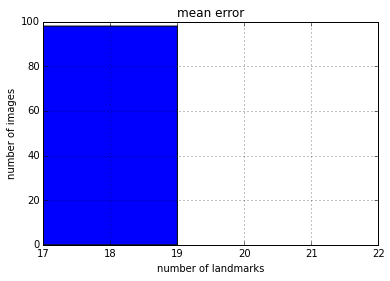

In [42]:
import matplotlib.pyplot as plt
plt.hist(error_mean,bins=[17,19,21,22])
plt.xlabel('number of landmarks')
plt.ylabel('number of images')
plt.title('mean error')
labels=[17, 19, 21]


plt.grid(True)

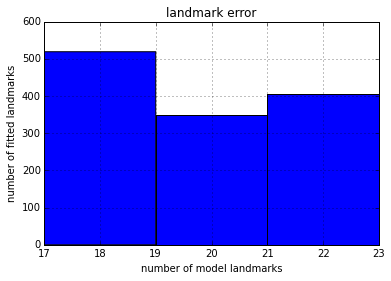

In [43]:
plt.hist(error_landmarks,bins=[17,19,21,23])
plt.xlabel('number of model landmarks')
plt.ylabel('number of fitted landmarks')
plt.title('landmark error')
plt.grid(True)

([array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.,  0.,  0.]),
  array([ 0.

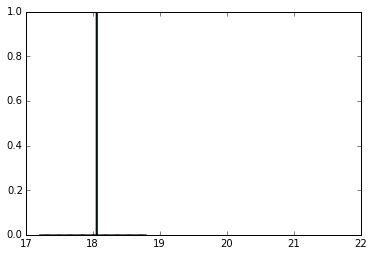

In [39]:
plt.hist(error_landmarks,bins=[17,19,21,22])

(array([ 985.,  754.,  809.]),
 array([17, 19, 21, 22]),
 <a list of 3 Patch objects>)

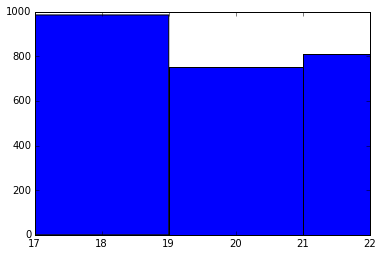

In [38]:

import matplotlib.pyplot as plt
flattened  = [val for sublist in error_results for val in sublist]
plt.hist(flattened,bins=[17,19,21,22])

In [2]:
aam_13=pickle_load(save_path+'PartsAAM_fast_dsiftFashionPose_3200.pickle')

In [ ]:
fitter_results_13=pickle_load(save_path+'PartsAAM_fast_dsift_noiseNoneFashionPose_3200.pickle')